# Homework #5: Generalized Linear Models (GLMs)

## Background

In 2014, the analytics website, FiveThirtyEight, published an analysis of the gender disparity in appearances in comic books at the two large studios, Marvel and DC. You're working for a small upstart comic book company and you want to work to understand what characteristics are associated with a reduction in appearances and thereby learn where gaps in representation can be filled by your firm. Using the data collected by FiveThirtyEight from the Marvel and DC wiki pages, you will fit an appropriate GLM to predict the number of appearances given this data.

### Relevant Datasets
* `marvel-wikia-data.csv`
* `dc-wikia-data.csv`


Article: https://fivethirtyeight.com/features/women-in-comic-books/

Aggregated Data: https://github.com/fivethirtyeight/data/tree/master/comic-characters

Data Sources:
* http://dc.wikia.com/wiki/Main_Page
* http://marvel.wikia.com/Main_Page

## Task 1: Concatenate the Marvel and DC datasets into a single dataset.

The function `pd.concat` will be useful for this. You should also create a new column in each dataset before concatenating that represents the studio for each. This will allow us to distinguish between the impact of one studio vs the other.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

In [ ]:
df1 = pd.read_csv("/content/dc-wikia-data.csv")
df1.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [ ]:
df2 = pd.read_csv("/content/marvel-wikia-data.csv")
df2.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [ ]:
df1["Studio"] = 'DC'
df2["Studio"] = 'Marvel'

In [ ]:
df2 = df2.rename(columns={"Year":"YEAR"})
df2.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Studio
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0,Marvel
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0,Marvel
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0,Marvel
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0,Marvel
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0,Marvel


In [ ]:
df1.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Studio
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,DC
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,DC
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,DC
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0,DC
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0,DC


In [ ]:
df_superhero = pd.concat([df1,df2])

In [ ]:
df_superhero.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Studio
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,DC
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,DC
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,DC
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0,DC
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0,DC


## Task 2: Subset the data to relevant variables and observations.

If you want to limit the number of levels, a good list of variables would be: `ALIGN`,`SEX`,`ALIVE`,`APPEARANCES`,`ID`,`Studio`. Given that this dataset includes a few `SEX` categories with very few observations, create a new binary variable for a character's `SEX` being Male or not Male. Also, remove any characters that only appear once.

In [ ]:
superhero = df_superhero[['ALIGN','SEX','ALIVE', 'APPEARANCES','Studio','ID']]
superhero = superhero.dropna(subset=['APPEARANCES'])
superhero.head()

,ALIGN,SEX,ALIVE,APPEARANCES,Studio,ID
0,Good Characters,Male Characters,Living Characters,3093.0,DC,Secret Identity
1,Good Characters,Male Characters,Living Characters,2496.0,DC,Secret Identity
2,Good Characters,Male Characters,Living Characters,1565.0,DC,Secret Identity
3,Good Characters,Male Characters,Living Characters,1316.0,DC,Public Identity
4,Good Characters,Male Characters,Living Characters,1237.0,DC,Secret Identity


In [ ]:
indexAppearances = superhero[ (superhero['APPEARANCES'] <= 1)  ].index
superhero.drop(indexAppearances , inplace=True)
superhero

,ALIGN,SEX,ALIVE,APPEARANCES,Studio,ID
0,Good Characters,Male Characters,Living Characters,3093.0,DC,Secret Identity
1,Good Characters,Male Characters,Living Characters,2496.0,DC,Secret Identity
2,Good Characters,Male Characters,Living Characters,1565.0,DC,Secret Identity
3,Good Characters,Male Characters,Living Characters,1316.0,DC,Public Identity
4,Good Characters,Male Characters,Living Characters,1237.0,DC,Secret Identity
...,...,...,...,...,...,...
10465,Bad Characters,Male Characters,Deceased Characters,2.0,Marvel,No Dual Identity
10466,Bad Characters,Male Characters,Living Characters,2.0,Marvel,Secret Identity
10467,Good Characters,Female Characters,Living Characters,2.0,Marvel,Secret Identity
10468,Bad Characters,Male Characters,Living Characters,2.0,Marvel,Secret Identity


In [ ]:
superhero['IS_MALE'] = np.where(superhero['SEX'] == "Male Characters", 1, 0)

In [ ]:
superhero = superhero.drop(['SEX'], axis=1)
superhero.head()

,ALIGN,ALIVE,APPEARANCES,Studio,ID,IS_MALE
0,Good Characters,Living Characters,3093.0,DC,Secret Identity,1
1,Good Characters,Living Characters,2496.0,DC,Secret Identity,1
2,Good Characters,Living Characters,1565.0,DC,Secret Identity,1
3,Good Characters,Living Characters,1316.0,DC,Public Identity,1
4,Good Characters,Living Characters,1237.0,DC,Secret Identity,1


In [ ]:
superhero = pd.get_dummies(data=superhero, drop_first=True)
superhero.head()

,APPEARANCES,IS_MALE,ALIGN_Good Characters,ALIGN_Neutral Characters,ALIGN_Reformed Criminals,ALIVE_Living Characters,Studio_Marvel,ID_Known to Authorities Identity,ID_No Dual Identity,ID_Public Identity,ID_Secret Identity
0,3093.0,1,1,0,0,1,0,0,0,0,1
1,2496.0,1,1,0,0,1,0,0,0,0,1
2,1565.0,1,1,0,0,1,0,0,0,0,1
3,1316.0,1,1,0,0,1,0,0,0,1,0
4,1237.0,1,1,0,0,1,0,0,0,0,1


## Task 3: Split your data into train/test and fit an appropriate GLM to the training data.

It will be up to you to determine the appropriate choice of distribution or family of the GLM. Look at residual plots and see if there are any red flags with this model.

In [ ]:
test = superhero.sample(frac=0.2, axis=0)
train = superhero.drop(index=test.index)

In [ ]:
Xtrain = train.drop(columns=['APPEARANCES'])
ytrain = train[['APPEARANCES']]

Xtest = test.drop(columns=['APPEARANCES'])
ytest = test[['APPEARANCES']]

In [ ]:
Xtrain = sm.add_constant(Xtrain)
Xtest = sm.add_constant(Xtest)

In [ ]:
poisson_model = sm.GLM(ytrain, Xtrain, family=sm.families.Poisson())
poisson_results = poisson_model.fit()
poisson_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            APPEARANCES   No. Observations:                10208
Model:                            GLM   Df Residuals:                    10197
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.8270e+05
Date:                Thu, 30 Mar 2023   Deviance:                   7.2559e+05
Time:                        04:35:56   Pearson chi2:                 2.72e+06
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                1.1385      0.010    112.672      0.000       1.119       1.158
IS_MALE                              0.1439      0.004     33.731      0.000       0.136       0.152
ALIGN_Good Characters                1.1718      0.005    250.758      0.000       1.163       1.181
ALIGN_Neutral Characters             0.6510      0.007     94.502      0.000       0.638       0.665
ALIGN_Reformed Criminals             0.9569      0.109      8.760      0.000       0.743       1.171
ALIVE_Living Characters              0.3506      0.005     68.778      0.000       0.341       0.361
Studio_Marvel                       -0.1604      0.004    -37.751      0.000      -0.169      -0.152
ID_Known to Authorities Identity     0.3710      0.094      3.929      0.000       0.186       0.556
ID_No Dual Identity                  1.5571      0.010    155.575      0.000       1.537       1.577
ID_Public Identity                   1.2196      0.008    144.278      0.000       1.203       1.236
ID_Secret Identity                   1.4212      0.008    171.119      0.000       1.405       1.437
====================================================================================================
"""

Text(0, 0.5, 'Fitted')

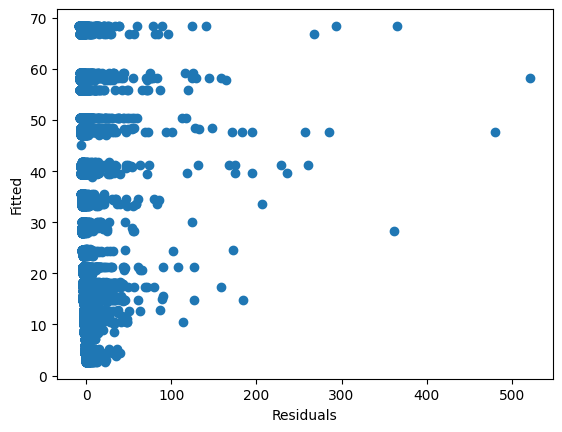

In [ ]:
plt.scatter(poisson_results.resid_pearson,poisson_results.mu)
#plt.xlim(0,150)
plt.xlabel('Residuals')
plt.ylabel('Fitted')

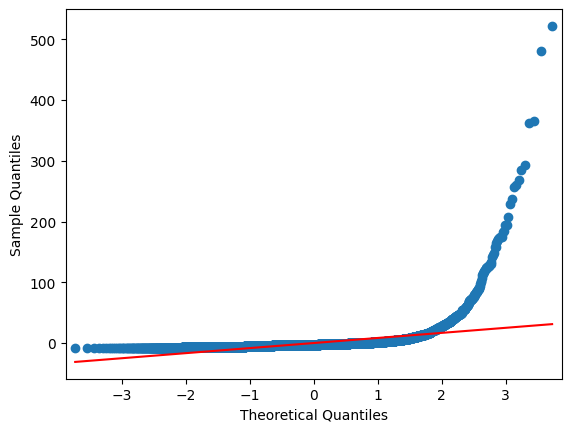

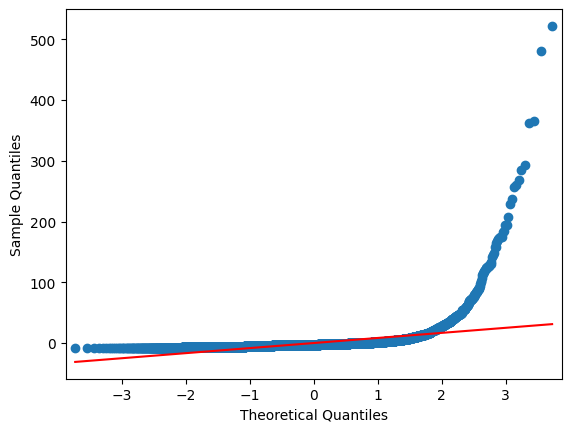

In [ ]:
from statsmodels import graphics
graphics.gofplots.qqplot(poisson_results.resid_pearson, line='r')

## Task 4: Interpret coefficients in the context of our original research question of "what characteristics are associated with a reduction in appearances?"

Note: You can ignore any broken assumptions at this point and simply treat it as an effective model.

Using the Poisson Model, our link function would be the ln(u). Meaning a one unit change in our predictor variable increases or decreases the change in our link function by the coefficient of our predictor variable. Characters in comic books that are males will increase the log of appearances by .144. Those characters who are good characters inecrease the log of apperances by 1.17. Characters in commic books with no dual identities increase the log of the appearances by 1.55. If a character is part of the Marvel Universe, it decreases the log of appearances by .16.
If a character is male, has various character qualities and ID situations, and not in Marvel, he will have a positive influence on the log of appearances in comic books.